In [3]:
%load_ext autoreload
%autoreload 2

import os,sys,inspect
current_dir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parent_dir = os.path.dirname(current_dir)
sys.path.insert(0, os.path.join(parent_dir)) 
import numpy as np
import pandas as pd

from coord2vec.models.data_loading.tile_features_loader import TileFeaturesDataset
from coord2vec.models.model_utils import get_data_loader, get_pytorch_dataset
from coord2vec.feature_extraction.features_builders import house_price_builder

from coord2vec.config import CACHE_DIR

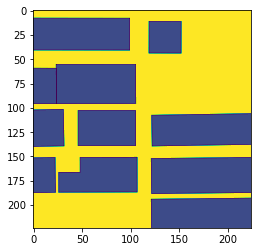

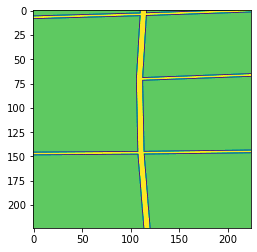

In [9]:
import matplotlib.pyplot as plt

dataset = TileFeaturesDataset(CACHE_DIR)

sample_ind = 8
plt.imshow(dataset[sample_ind][0][0])
plt.show()

plt.imshow(dataset[sample_ind][0][1])
plt.show()

In [6]:
from coord2vec.models.baselines import Coord2Vec

coord2vec = Coord2Vec(house_price_builder, n_channels=3 , tb_dir='house_pricing')
coord2vec.fit(dataset, epochs=20, batch_size=64)
pass

In [5]:
path = r'../coord2vec/models/saved_models/first_model.pt'
coord2vec.save_trained_model(path)

### Try to fit the network for each feature individualy

In [7]:
from coord2vec.models.data_loading.create_dataset_script import sample_and_save_dataset
from coord2vec.feature_extraction.features_builders import house_price_builder, FeaturesBuilder
from coord2vec.models.data_loading.tile_features_loader import SingleTileFeaturesDataset

n_features = len(house_price_builder.features)

for i in range(n_features):
    dataset = SingleTileFeaturesDataset(CACHE_DIR, feature_index=i)
    feature_builder = FeaturesBuilder(features=[house_price_builder.features[i]])
    coord2vec = Coord2Vec(feature_builder, n_channels=3 , tb_dir='single_feature')
    coord2vec.fit(dataset, epochs=20, batch_size=64)


Epochs: 100%|██████████| 20/20 [02:20<00:00,  7.04s/epoch]

### Try log loss

In [11]:
log_coord2vec = Coord2Vec(house_price_builder, n_channels=3 ,log_loss=True,  tb_dir='log_loss')
log_coord2vec.fit(dataset, epochs=20, batch_size=64)
pass

Epochs: 100%|██████████| 20/20 [02:20<00:00,  7.11s/epoch]
